In [21]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('Ethnic Studies.csv')

In [25]:
df.head()

,paper_id,publication_year,concept,concept_no,npaper_ids_using_concept
0,64201299,2016,wave,0,28
1,64205410,2016,understanding,0,395
2,64210651,2016,article,0,4260
3,64213293,2016,article,0,4260
4,64213556,2016,western europe,0,58


In [27]:
import pandas as pd

# Assuming df is your dataframe

# Group by 'publication_id' and keep only unique 'concept' values
df_unique_keywords = df.groupby('paper_id').apply(lambda x: x.drop_duplicates(subset=['concept'])).reset_index(drop=True)

# Print the result
print(df_unique_keywords)


        paper_id  publication_year                         concept  \
0       21760570              1992                           datum   
1       21760570              1992                     1980 census   
2       21760570              1992             three major finding   
3       21760570              1992                           study   
4       21760570              1992  labor force participation rate   
...          ...               ...                             ...   
188320  64535555              2016                          health   
188321  64535555              2016                          racism   
188322  64535555              2016                            deep   
188323  64535555              2016                          belief   
188324  64535555              2016                        italians   

        concept_no  npaper_ids_using_concept  
0                0                       701  
1                1                         2  
2                2

/var/folders/p0/jsszp6z14fd0nzh105t2v9fh0000gn/T/ipykernel_1401/2841253248.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique_keywords = df.groupby('paper_id').apply(lambda x: x.drop_duplicates(subset=['concept'])).reset_index(drop=True)


In [28]:
len(df_unique_keywords['paper_id'].unique())

7628

In [31]:
from collections import Counter
word_list=df_unique_keywords['concept'].str.strip()
word_freq=Counter(word_list)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)
# Calculate the total frequency
total_frequency = word_freq_df['frequency'].sum()

# Add a new column for percentage frequency
word_freq_df['percentage'] = (word_freq_df['frequency'] / total_frequency) * 100

# Print the result
print(word_freq_df)

                              word  frequency  percentage
0                          article       3041    1.614762
1                            study       1633    0.867118
2                              who       1421    0.754547
3                           result       1391    0.738617
4                            paper       1338    0.710474
...                            ...        ...         ...
23136           suicide death rate          1    0.000531
23137          ethnocentric policy          1    0.000531
23138       transnational migrancy          1    0.000531
23139                  early unhcr          1    0.000531
23140  teacher training initiative          1    0.000531

[23141 rows x 3 columns]


In [33]:
import os
word_freq_df.to_csv('word_frequency.csv', index=False)

In [35]:
total_percentage = word_freq_df['percentage'].sum()

In [37]:
total_percentage

99.99999999999999

In [39]:
# Group by frequency and count the number of words with each frequency
frequency_distribution = word_freq_df.groupby('frequency').size().reset_index(name='count')

# Rename columns for clarity
frequency_distribution.columns = ['frequency', 'word_count']

# Sort by frequency in ascending order
frequency_distribution = frequency_distribution.sort_values(by='frequency')

# Print the result
print(frequency_distribution)


     frequency  word_count
0            1        4669
1            2        8374
2            3        3072
3            4        1578
4            5        1029
..         ...         ...
269       1338           1
270       1391           1
271       1421           1
272       1633           1
273       3041           1

[274 rows x 2 columns]


In [41]:
frequency_distribution.to_csv('frequency_distribution.csv', index=False)

In [43]:
# Group the dataframe by 'concept' (keyword) and aggregate the publication years
keyword_years = df_unique_keywords.groupby('concept')['publication_year'].apply(list).reset_index()

# Merge the frequency DataFrame with the publication years DataFrame
word_freq_with_years = pd.merge(word_freq_df, keyword_years, left_on='word', right_on='concept', how='left')

# Drop the redundant 'concept' column and keep 'word'
word_freq_with_years = word_freq_with_years.drop(columns=['concept'])

# Save the result with publication years
word_freq_with_years.to_csv('word_frequency_with_years.csv', index=False)

# Print the result
print(word_freq_with_years)

                              word  frequency  percentage  \
0                          article       3041    1.614762   
1                            study       1633    0.867118   
2                              who       1421    0.754547   
3                           result       1391    0.738617   
4                            paper       1338    0.710474   
...                            ...        ...         ...   
23136           suicide death rate          1    0.000531   
23137          ethnocentric policy          1    0.000531   
23138       transnational migrancy          1    0.000531   
23139                  early unhcr          1    0.000531   
23140  teacher training initiative          1    0.000531   

                                        publication_year  
0      [1992, 1992, 1992, 1992, 1992, 1992, 1992, 199...  
1      [1992, 1992, 1992, 1992, 1992, 1992, 1992, 199...  
2      [1992, 1992, 1992, 1992, 1992, 1992, 1993, 199...  
3      [1992, 1992, 1992, 1992,

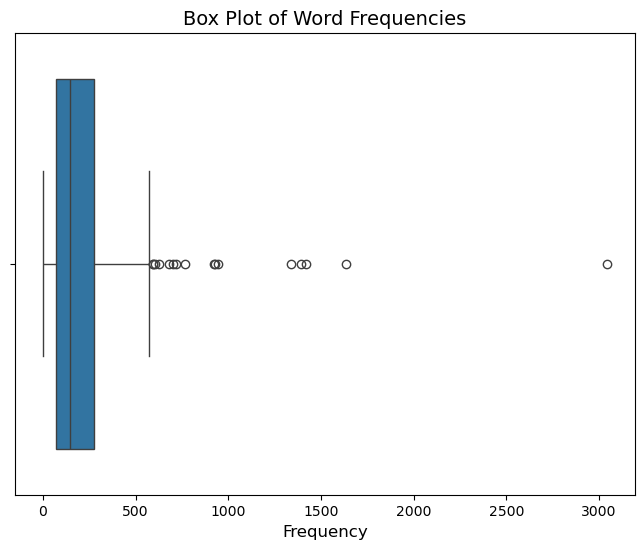

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have the frequency_distribution DataFrame

# Set the plot size
plt.figure(figsize=(8, 6))

# Create the box plot for the 'frequency' column
sns.boxplot(x=frequency_distribution['frequency'])

# Set the title and labels
plt.title('Box Plot of Word Frequencies', fontsize=14)
plt.xlabel('Frequency', fontsize=12)

# Display the plot
plt.show()



In [46]:
frequency_distribution['frequency'].describe()

count     274.000000
mean      221.569343
std       286.402961
min         1.000000
25%        69.250000
50%       147.000000
75%       274.750000
max      3041.000000
Name: frequency, dtype: float64

In [47]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = frequency_distribution['frequency'].quantile(0.25)
q3 = frequency_distribution['frequency'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Find outliers
outliers = frequency_distribution[(frequency_distribution['frequency'] < lower_bound) | 
                                  (frequency_distribution['frequency'] > upper_bound)]

# Merge to find the words corresponding to these outlier frequencies
outlier_words = pd.merge(outliers, word_freq_df, left_on='frequency', right_on='frequency', how='left')

# Print the words that are outliers along with their frequencies
print("Outlier words and their frequencies:")
print(outlier_words[['word', 'frequency']])


Outlier words and their frequencies:
            word  frequency
0        context        595
1     experience        596
2        process        604
3          datum        625
4           role        682
5       research        700
6   relationship        718
7           race        767
8       analysis        923
9        finding        927
10           way        943
11         paper       1338
12        result       1391
13           who       1421
14         study       1633
15       article       3041


In [48]:
# Filter the words with frequency between 1 and 5
filtered_words = word_freq_with_years[word_freq_with_years['frequency'].between(1, 5)]

# Explode the 'publication_year' column so that each year gets its own row
filtered_words = filtered_words.explode('publication_year')

# Ensure that publication_year is numeric for comparison
filtered_words['publication_year'] = filtered_words['publication_year'].astype(int)

# Sort the DataFrame by 'word' and 'publication_year'
filtered_words = filtered_words.sort_values(by=['word', 'publication_year'])


In [49]:
# Define the consecutive year pairs we are interested in
consecutive_year_pairs = [(2012, 2013), (2013, 2014), (2014, 2015), (2015, 2016)]

# Function to check if a word appears in the consecutive year pairs
def check_consecutive_years(group):
    years = group['publication_year'].values
    consecutive_years = []
    for year_pair in consecutive_year_pairs:
        if all(year in years for year in year_pair):
            consecutive_years.append(year_pair)
    return pd.Series({'consecutive_years': consecutive_years})

# Apply the function to each word group
consecutive_words = filtered_words.groupby('word').apply(check_consecutive_years).reset_index()

# Filter out words with no consecutive years
consecutive_words = consecutive_words[consecutive_words['consecutive_years'].apply(len) > 0]

# Print the result
print("Words appearing in consecutive years:")
print(consecutive_words[['word', 'consecutive_years']])


Words appearing in consecutive years:
                        word consecutive_years
6             1 5 generation    [(2014, 2015)]
14              1 perception    [(2012, 2013)]
19           10th 11th grade    [(2014, 2015)]
44                  18 month    [(2014, 2015)]
46             18 to 25 year    [(2014, 2015)]
...                      ...               ...
18652        young black man    [(2014, 2015)]
18657        young immigrant    [(2013, 2014)]
18668  young people s agency    [(2015, 2016)]
18695                youtube    [(2015, 2016)]
18702           yugoslav war    [(2013, 2014)]

[2068 rows x 2 columns]


/var/folders/p0/jsszp6z14fd0nzh105t2v9fh0000gn/T/ipykernel_1401/1710931012.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_words = filtered_words.groupby('word').apply(check_consecutive_years).reset_index()


In [54]:
len(consecutive_words)

2068

In [55]:
consecutive_words.head(20)

,word,consecutive_years
6,1 5 generation,"[(2014, 2015)]"
14,1 perception,"[(2012, 2013)]"
19,10th 11th grade,"[(2014, 2015)]"
44,18 month,"[(2014, 2015)]"
46,18 to 25 year,"[(2014, 2015)]"
53,1951 refugee convention,"[(2014, 2015)]"
63,2 factor model,"[(2015, 2016)]"
65,2 group,"[(2014, 2015), (2015, 2016)]"
69,2 type,"[(2015, 2016)]"
76,20 year,"[(2013, 2014)]"


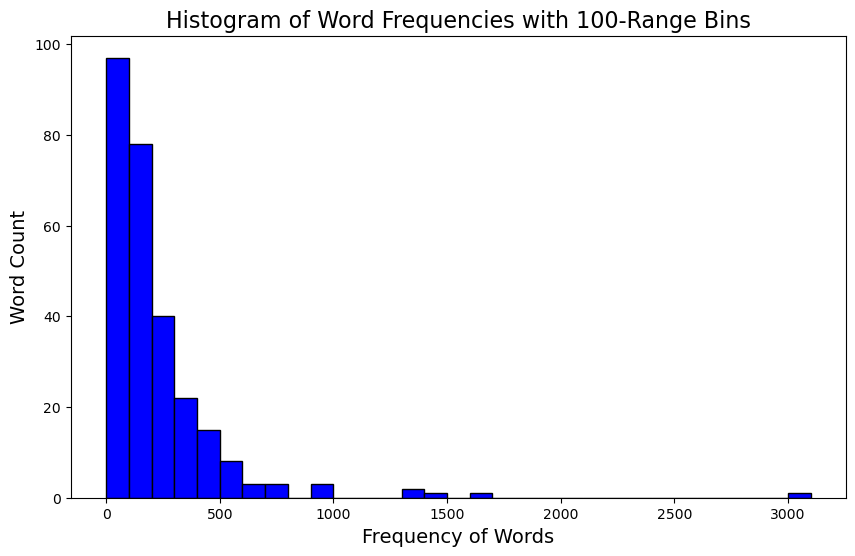

In [56]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Plot the histogram with bins of size 100
plt.hist(frequency_distribution['frequency'], bins=range(0, max(frequency_distribution['frequency']) + 100, 100), color='blue', edgecolor='black')

# Set the title and labels
plt.title('Histogram of Word Frequencies with 100-Range Bins', fontsize=16)
plt.xlabel('Frequency of Words', fontsize=14)
plt.ylabel('Word Count', fontsize=14)

# Show the plot
plt.show()


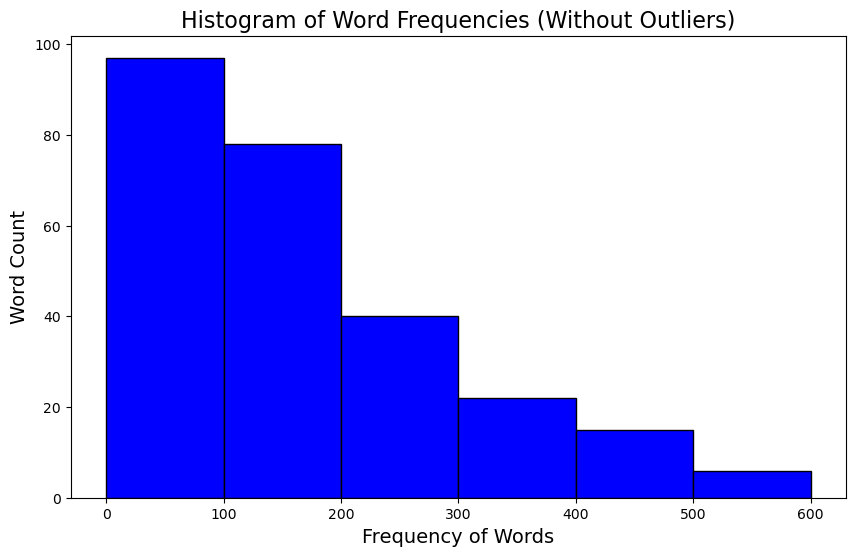

In [57]:
import matplotlib.pyplot as plt

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = frequency_distribution['frequency'].quantile(0.25)
q3 = frequency_distribution['frequency'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers from the frequency distribution
filtered_data = frequency_distribution[(frequency_distribution['frequency'] >= lower_bound) & 
                                       (frequency_distribution['frequency'] <= upper_bound)]

# Plot the histogram with bins of size 100 (without outliers)
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['frequency'], bins=range(0, max(filtered_data['frequency']) + 100, 100), color='blue', edgecolor='black')

# Set the title and labels
plt.title('Histogram of Word Frequencies (Without Outliers)', fontsize=16)
plt.xlabel('Frequency of Words', fontsize=14)
plt.ylabel('Word Count', fontsize=14)

# Show the plot
plt.show()


In [94]:
# Save the filtered data (without outliers) to a CSV file
filtered_data.to_csv('filtered_frequency_distribution.csv', index=False)

print("Filtered frequency distribution saved as 'filtered_frequency_distribution.csv'.")


Filtered frequency distribution saved as 'filtered_frequency_distribution.csv'.


In [96]:
# Remove outliers from the frequency distribution
filtered_data = frequency_distribution[(frequency_distribution['frequency'] >= lower_bound) & 
                                       (frequency_distribution['frequency'] <= upper_bound)]

# Get the words that are not outliers
non_outlier_words = filtered_data['frequency'].index.tolist()  # Get the indices of non-outlier frequencies

# Create a mask to filter the original DataFrame based on the non-outlier words
mask = word_freq_df['frequency'].isin(filtered_data['frequency'])

# Filter the original DataFrame to keep all columns for non-outlier words
filtered_original_df = word_freq_df[mask]

# Save the filtered original DataFrame (without outliers) to a CSV file
filtered_original_df.to_csv('filtered_word_frequency_with_all_columns.csv', index=False)

print("Filtered original DataFrame saved as 'filtered_word_frequency_with_all_columns.csv'.")


Filtered original DataFrame saved as 'filtered_word_frequency_with_all_columns.csv'.


In [107]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Make sure to download the stopwords list if you haven't already
nltk.download('stopwords')

# Load the stop words in English
stop_words = set(stopwords.words('english'))

# Create a function to remove stop words, words with length less than 4, and frequency greater than 600
def remove_unwanted_words(df):
    # Filter out stop words, words with length less than 4, and frequency > 600
    df_filtered = df[
        ~df['word'].isin(stop_words) & 
        (df['word'].str.len() >= 4) &  # Keep words of length 4 or more
        (df['frequency'] <= 600)
    ]
    
    # Drop the 'percentage' column
    df_filtered = df_filtered.drop(columns=['percentage'], errors='ignore')
    
    return df_filtered

# Assuming your DataFrame is named 'word_freq_df'
word_freq_df_cleaned = remove_unwanted_words(word_freq_df)

# Print the cleaned DataFrame
print(word_freq_df_cleaned)

# Save the cleaned DataFrame to a CSV file
word_freq_df_cleaned.to_csv('word_frequency_without_stopwords_length_less_than_4_frequency_over_600_no_percentage.csv', index=False)

print("Cleaned word frequency data saved as 'word_frequency_without_stopwords_length_less_than_4_frequency_over_600_no_percentage.csv'.")


                              word  frequency
14                      experience        596
15                         context        595
16                           group        571
17                      difference        566
18                          people        566
...                            ...        ...
23136           suicide death rate          1
23137          ethnocentric policy          1
23138       transnational migrancy          1
23139                  early unhcr          1
23140  teacher training initiative          1

[22730 rows x 2 columns]
Cleaned word frequency data saved as 'word_frequency_without_stopwords_length_less_than_4_frequency_over_600_no_percentage.csv'.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chandutholeti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

# Sample data: replace this with your actual DataFrame
data = {
    'paper_id': [1, 2, 3],
    'keywords': [
        ['keyword1', 'keyword2', 'keyword3'],
        ['keyword2', 'keyword4'],
        ['keyword1', 'keyword3', 'keyword5']
    ]
}

df = pd.DataFrame(data)

# Create a set of unique keywords
unique_keywords = set()
for keywords in df['keywords']:
    unique_keywords.update(keywords)

# Create an incidence matrix
incidence_matrix = pd.DataFrame(0, index=unique_keywords, columns=df['paper_id'])

# Fill the incidence matrix
for index, row in df.iterrows():
    for keyword in row['keywords']:
        incidence_matrix.loc[keyword, row['paper_id']] = 1

# Display the incidence matrix
print(incidence_matrix)
